# Projeto 2- Ciência dos Dados 2021.2

### Integrantes: Fabio Ferreira; Guillermo Kuznietz; Livia Brigido.

### Ideia Inicial: 
#### 

## Definição do problema:

### Predição de quão feliz é uma população a partir de índices como saúde, família, PIB e nível de corrupção :) 

In [220]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\liviabn\Documents\Cdados- Projetos\P2Cdados2021_2\Projeto2_CienciaDados


## Carregando bibliotecas necessárias para a análise dos dados:

In [221]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1. Manipulando a base de dados:

In [222]:
#Lendo a base de dados
data19= pd.read_csv("2019.csv")
data19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [223]:
#Confirmando que nossa base de dados não tem nenhuma linha (país/região) com dados faltando
data19 = data19.dropna()
#No caso, se tivesse, conseguiríamos observar pela mudança da quantidade de linhas
data19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [224]:
data19.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [225]:
# Como o overall rank é uma outra forma de representar o score, só que baseando-se em posições:
data19=data19.drop(columns=["Overall rank"])

#Como nossa análise númerica
data19= data19.drop(columns=["Country or region"])

In [226]:
data19.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [227]:
#Renomeando para facilitar a leitura
data19= data19.rename(columns={"Score":"Happiness Score"})
data19

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


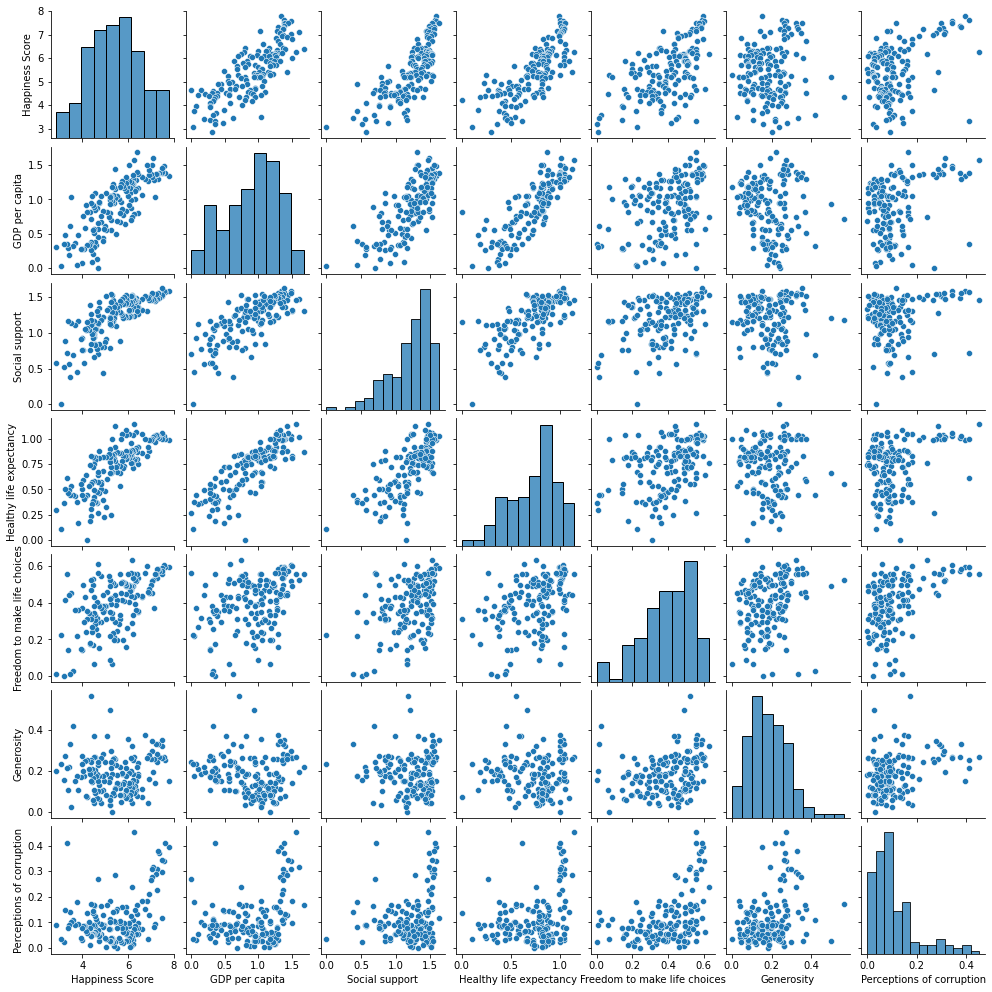

In [231]:
import seaborn as sns
sns.pairplot(data19, height=2);

In [229]:
#O que são nossas features e o nosso target:
X = data19[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption']]
Y = data19['Happiness Score']

In [230]:
def regress(Y,X):
    
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

results = regress(Y,X)
results.summary()

#Desde já, conseguimos analisar se as features se comportam como imaginado pela hipótese inicial: Não influenciam na felicidade
#OBS: Levando em conta um alpha padrão de 10%, já é possível analisar quem será descartado.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.40e-46
Time:                        20:03:44   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
# Backward Stepwise-- Após retirar Generosity
X = data19[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']]
Y = data19['Happiness Score']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           3.59e-47
Time:                        20:08:07   Log-Likelihood:                -120.27
No. Observations:                 156   AIC:                             252.5
Df Residuals:                     150   BIC:                             270.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.8689      0.197      9.471      0.000       1.479       2.259
GDP per capita                   0.7455      0.216      3.450      0.001       0.319       1.172
Social support                   1.1180      0.237      4.722      0.000       0.650       1.586
Healthy life expectancy          1.0840      0.334      3.241      0.001       0.423       1.745
Freedom to make life choices     1.5340      0.367      4.185      0.000       0.810       2.258
Perceptions of corruption        1.1176      0.522      2.142      0.034       0.086       2.149
==============================================================================
Omnibus:                        9.283   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.278
Skew:                          -0.527   Prob(JB):                      0.00967
Kurtosis:                       3.562   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""